<a href="https://colab.research.google.com/github/mayabayati/Algorithms/blob/master/hyp_testing_JOLT_Wald_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing JOLT

George Lifchits Sep 2020, originally downloaded from [this link](https://www.cs.toronto.edu/~glifchits/public/hyp%20testing%20JOLT%20-%20Wald%20test.html), edited by Yuya Asano Apr 2021.

This notebook draws heavily on material from _Wasserman - All of Statistics (2004)_ chapter 10.1 and 10.2.  
Access to this chapter should be available to anyone with a UofT login at [this link](https://link-springer-com.myaccess.library.utoronto.ca/chapter/10.1007/978-0-387-21736-9_10)

**Before running this notebook, please download it from File > Save a Copy in Drive at the top left so that other people can see a clean notebook.**

**This notebook has interactive features.**  Sections with `@interact` code blocks can be run with `ipywidgets`, which provides slider bars which let you play with parameters and see graphs change.

**You do NOT have to understand code in this notebook to understand statistics!** The code is there just to simulate and illustrate examples.

## Begin the JOLT here

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

In [ ]:
np.random.seed(1)

## The experiment

Suppose we are providing math students with explanations for a particular problem. After the student reads the explanation they can rate it as either "good" or "bad". Of course, we want to provide students with the best explanations so we want to learn whether one explanation is better than another one.

Let's call our two explanations $A$ and $B$, and suppose they have an underlying true probability of being rated "good" to be $p_A=0.6$ and $p_B=0.3$ – but, we do not know this underlying true probability.

We provided these explanations to students in an experiment:

In [ ]:
exp_A = stats.bernoulli.rvs(p=0.4, size=30)
exp_B = stats.bernoulli.rvs(p=0.5, size=20)

After the experiment, we collected these ratings from students. 1 is "good" and 0 is "bad".

For the first explanation $A$ we got:

In [ ]:
exp_A

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

For the other explanation $B$ we got:

In [ ]:
exp_B

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

## What does the experiment show?

First lets compute the means of the experiment outcomes, and their standard errors.

In [ ]:
p_a = exp_A.mean()
p_b = exp_B.mean()
N_A = len(exp_A)
N_B = len(exp_B)
se_a = np.sqrt((p_a*(1-p_a))/N_A)
se_b = np.sqrt((p_b*(1-p_b))/N_B)
print(p_a, p_b)

0.3 0.55


Now let's visualize the data.  We plot the mean outcomes as well as the standard error of the means, to illustrate uncertainty about the measurement.

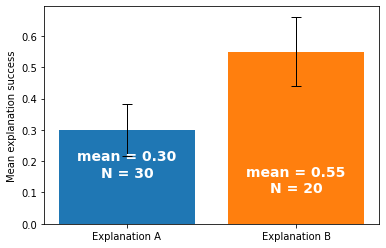

In [ ]:
# Making a bar for explanation A
plt.bar(x=0, height=p_a)
plt.errorbar(x=0, y=p_a, yerr=se_a, color='black', capsize=5, linewidth=1)
fd = {'fontweight':'bold', 'fontsize': 14, 'color': 'white'}
plt.text(0, 0.15, f"mean = {p_a:.2f}\nN = {N_A}", 
         horizontalalignment="center", fontdict=fd)

# Making a bar for explanation B
plt.bar(x=1, height=p_b)
plt.errorbar(x=1, y=p_b, yerr=se_b, color='black', capsize=5, linewidth=1)
plt.text(1, 0.10, f"mean = {p_b:.2f}\nN = {N_B}", 
         horizontalalignment="center", fontdict=fd)

# Adding labels to the plot
plt.xticks([0, 1], labels=['Explanation A', 'Explanation B'])
plt.ylabel("Mean explanation success");

Visualizing the data, it seems as though explanation A is better than B.  The error bars which indicate standard error of the mean even seem to support this claim.

_However_, these are random quantities.  If we collected more data, the graph might show a different result.

How can we _prove_ whether one explanation is in fact better than the other?

## Forming hypotheses

Recall that we **don't know** $p_A$ and $p_B$: all we have is the data collected after our experiment.

A simple question we can ask is: "is one explanation better than the other?" We can try to answer this with hypothesis testing.

Similar to a legal trial where we say "innocent until proven guilty," the null hypothesis always assumes "innocence" unless the evidence allows us to confidently **reject** the idea of innocence in favour of the alternative hypothesis.

### Identify the hypotheses

Our default assumption is the boring and uninteresting one which states that the two explanations are equally effective:
$$\text{default} : p_A = p_B$$

Therefore, our alternative should encompass all other possibilities:
$$\text{alternative} : p_A \neq p_B$$

### Formalizing the null and alternative hypotheses

These are good, but there are two parameters being looked at here (that is, the means of each explanation).  With hypothesis testing it is usually easier to test one single parameter at a time.  So we find a way to combine these two values into one.

If $p_A = p_B$ then $p_A - p_B = 0$.  Call the difference $\delta = p_A - p_B$.  Now $\delta$ is a single value that we can test.  Great!

Our null hypothesis ($H_0$) is therefore the test that there is _no difference in means_:
$$H_0 : \delta = 0$$

Therefore, our alternative hypothesis ($H_1$) is the test that there **is** a difference in means:
$$H_1 : \delta \neq 0$$

### How do we answer the question with our evidence?

If our null hypothesis $H_0$ were *correct*, then the answer to our question is that both explanations are the same, and so one is not better than the other. But if the alternative hypothesis $H_1$ was correct, then our answer would be that yes, one explanation *is* better than the other one.

We should use the data that we collected as *evidence* that supports either $H_0$ or $H_1$.  To make use of this we must make some statistical assumptions.

Suppose we had infinite data — if we think its reasonable that the test parameter is taken from a Normal (Gaussian; bell-curve) distribution, then we can make use of the **Wald test**.

In our example, we are interested in the **difference in means** of the data, so this assumption is reasonable.  (See the appendix section ["Assuming Normality"](#Exploring-Bernoulli-distribution,-deriving-Binomial,-assuming-Normality) to understand why this is a fair assumption for our data.)

## The Wald Test

In general, for any test parameter $\theta$ which is asymptotically Normal, the Wald test is a valid hypothesis test we can perform.

First compute the value $W = \frac{\hat{\theta} - \theta_0}{\hat{se}}$. If $|W| > z_{\alpha/2}$ then you can reject the null hypothesis!

Let's run the computation for our example and see what this means.

### Computing the test parameter

Our test parameter is $\hat{\delta} = \hat{p_A} - \hat{p_B}$, which is the _sample difference in means_. 

> The ^ "hats" denotes a sample quantity (what we actually observed -- an "estimate" of the theoretical value). 
> No hat refers to a theoretical quantity (which will forever be unknown, since it requires infinite data)

In [ ]:
delta = p_a - p_b
print(f'^delta = {delta:.4f}')

^delta = -0.1667


### Compute the sample standard error

Now that we're dealing with a difference in means, it's not the same standard error calculation as before. This time, it is computed as follows:
$$\hat{se} = \sqrt{ \frac{\hat{p_A}(1-\hat{p_A})}{N_A} + \frac{\hat{p_B}(1-\hat{p_B})}{N_B}}$$

In [ ]:
se = np.sqrt((p_a*(1-p_a)) / N_A  +  (p_b*(1-p_b)) / N_B)
print(f'^se = {se:.4f}')

^se = 0.1411


### Compute the test statistic

This is the value of $W$

In [ ]:
W = (delta - 0) / se
print(f"W = {W:.4f}")

W = -1.1812


### Find the appropriate z-score

Supposing our alpha = 0.05

In [ ]:
alpha = 0.00005
norm = stats.norm(loc=0, scale=1)
z = norm.ppf(1-(alpha/2))
print(f'z_alpha/2 = {z:.2f}') # this is a good z-score to memorize!

z_alpha/2 = 4.06


### Run the hypothesis test!

Can we reject the null hypothesis, and accept the alternative? Is one explanation better than the other?

In [ ]:
abs(W) > z

False

## What is the Wald test doing?

With the Wald test, we computed $W$ and then did a comparison. What does this all mean?

Recall: $W = \frac{\hat{\theta} - \theta_0}{\hat{se}}$. If $|W| > z_{\alpha/2}$ then you can reject the null hypothesis!

### How does the Wald statistic work?

Let's start with the one arm example: comparing the arm (i.e. condition) with a fixed proportion, say, 0.5. In hypothesis testing, we assume the null hypothesis is true. So, suppose the arm actually returns 1 with the probability of 0.5 (i.e. the null hypotheis is true in the real world) and see the distribution of the sample mean by running the same experiment many times.

The mean is 0.49956300000000003 and the standard deviation is 0.07089110685410406


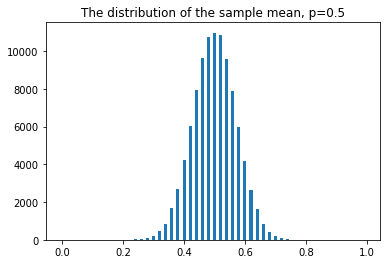

In [ ]:
mean = 0.5 # The true underlining probability 
num_samples = 50 # The size of samples in one experiment
num_exp = 100000 # The number of experiments 

# Running experiments and plotting them
sample_A = stats.bernoulli.rvs(p=prop, size=(num_exp, num_samples))
p_A = np.mean(sample_A, axis=1)
print(f"The mean is {np.mean(p_A)} and the standard deviation is {np.std(p_A)}")
plt.title(f"The distribution of the sample mean, p={mean}")
plt.hist(p_A, bins=np.arange(-0.005, 1.005, 0.01));

The sample mean is (very close to) 0.5 and the standard deviation is (very close to) $\sqrt{\frac{p^2}{n}}$, which is called the standard error of the mean. Based on the graph above, you can intuitively tell that it is very unlikely to get a sample mean equal to like 0.8. But how can we quantify the level of (un)likelihood? What the Wald test does is to transform this distribution so that we can compute the (un) likelihood. Let's see how this distribution will look like after transformed by the Wald test!

The mean is -0.006491526538156053 and the standard deviation is 1.0354734424158398


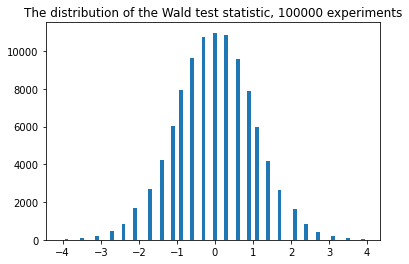

In [ ]:
# Computing the Wald test statistics
delta = p_A - mean
se = np.sqrt((p_A*(1-p_A)) / num_samples)
W = (delta - 0) / se

# Plotting the distribution of the Wald test statistics
print(f"The mean is {np.mean(W)} and the standard deviation is {np.std(W)}")
plt.title(f"The distribution of the Wald test statistic, {num_exp} experiments")
plt.hist(W, bins=np.arange(-4.05, 4.05, 0.1));

After the transformation, $W \sim \mathcal{N}(0, 1)$. In plain English, $W$ is [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution) and its [mean](https://en.wikipedia.org/wiki/Arithmetic_mean) is 0 and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) is 1 (if you are interested, this is caused by [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)). The nice thing about this special normal distribution ($\mathcal{N}(0, 1)$) is that the probability of getting a certain value of $W$ or something more extreme is precomputed as the [z-table](http://www.z-table.com/) (this probability is a [p-value](#scrollTo=FA2F7f31z7rO) described below). Because of this, if you get a very high or low $W$ like 2 or -3, you can say it is very unlikely to get such $W$ under the assumption that the null hypothesis is true. Therefore, you can reject the null hypothesis and claim that the arm proportion is different from 0.5.

Let's move on to the two arm example, i.e., comparing the two arm means. Again, since we first assume the null hypothesis is true in hypothesis testing, suppose the null hypothesis is the ground truth (i.e. the arm means are the same between the two arms). Then, what value will the Wald statistic take?

In [ ]:
# The same true underlining probability for arm A and arm B and the size of samples
mA = 0.5
mB = 0.5
nA = 50
nB = 50

# Computing the Wald test statistic
delta = mA - mB
se = np.sqrt((mA*(1-mA)) / nA  +  (mB*(1-mB)) / nB)
print(f'^delta = {delta:.4f}, ^se = {se:.4f}')
W = (delta - 0) / se
print(f"W = {W:.4f}")

^delta = 0.0000, ^se = 0.1000
W = 0.0000


It's 0 because the numorator of the Wald test statistic is the difference between the arm means. However, when we run experiments in the real world, it may not be the case because sample means are random variables. So, let's run experiments many times with the two arms of the same mean to see the distribution of $W$.

The mean is 0.0011795051052614523 and the standard deviation is 1.02138087178401


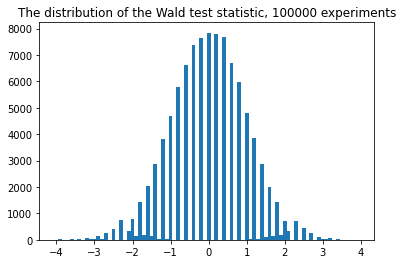

In [ ]:
# The same true underlining probability for arm A and arm B and the size of samples
prop = 0.5
num_samples = 50
num_exp = 100000 # The number of experiments

# Running experiments
sample_A = stats.bernoulli.rvs(p=prop, size=(num_exp, num_samples))
sample_B = stats.bernoulli.rvs(p=prop, size=(num_exp, num_samples))

# Computing the Wald test statistics
p_A = np.mean(sample_A, axis=1)
p_B = np.mean(sample_B, axis=1)
delta = p_A - p_B
se = np.sqrt((p_A*(1-p_A)) / num_samples  +  (p_B*(1-p_B)) / num_samples)
W = (delta - 0) / se

# Showing the results and a plot
print(f"The mean is {np.mean(W)} and the standard deviation is {np.std(W)}")
plt.title(f"The distribution of the Wald test statistic, {num_exp} experiments")
plt.hist(W, bins=np.arange(-4.05, 4.05, 0.1));

Again, as shown in the simulation above, $W \sim \mathcal{N}(0, 1)$. Therefore, if you get a very high or low $W$ like 2 or -3 (hence a lower [p-value](#scrollTo=FA2F7f31z7rO)), you can reject the null hypothesis and claim there is indeed a difference between the two arms.  

Now, what makes $W$ very high or very low? Ultimately, it relies on the difference in means and the standard error.  Let's look at a few examples of this.

Suppose we had the A/B conditions, our means (m) were very similar, and we collected a large sample size for each condition (n).

In [ ]:
mA = 0.53
mB = 0.52
nA = 199
nB = 202

In [ ]:
delta = mA - mB
se = np.sqrt((mA*(1-mA)) / nA  +  (mB*(1-mB)) / nB)
print(f'^delta = {delta:.4f}, ^se = {se:.4f}')

^delta = 0.0100, ^se = 0.0499


With similar means and large samples, the Wald statistic will be small!

In [ ]:
W = (delta - 0) / se
print(f"W = {W:.4f}")

W = 0.2005


Now suppose we had very different means in the A/B conditions.

In [ ]:
mA = 0.7
mB = 0.2
nA = 199
nB = 202
delta = mA - mB
se = np.sqrt((mA*(1-mA)) / nA  +  (mB*(1-mB)) / nB)
print(f'^delta = {delta:.4f}, ^se = {se:.4f}')

^delta = 0.5000, ^se = 0.0430


With very different means the Wald statistic is very large!

In [ ]:
W = (delta - 0) / se
print(f"W = {W:.4f}")

W = 11.6331


What if the means are still very different, but our sample size was very small?

In [ ]:
mA = 0.7
mB = 0.2
nA = 5
nB = 6
delta = mA - mB
se = np.sqrt((mA*(1-mA)) / nA  +  (mB*(1-mB)) / nB)
print(f'^delta = {delta:.4f}, ^se = {se:.4f}')
W = (delta - 0) / se
print(f"W = {W:.4f}")

^delta = 0.5000, ^se = 0.2620
W = 1.9081


If the means are similar then the null hypothesis (that the means are the same) is quite likely to be true.  But if the means are very different then the null hypothesis is quite _unlikely_ to be true!

On the other hand, if the means are different but the sample size is small, then it is quite possible that we got a fluke.  Thus, it is not so unlikely that the means would be extremely different in a small sample.

The Wald statistic is therefore a measure of "how extreme" the difference in means is.  We will end up translating it to a probability that the evidence would be this extreme under the null hypothesis.

In [ ]:
@interact(mA=(0, 1, 0.05), mB=(0, 1, 0.05), nA=(1, 100), nB=(1,100))
def wald_statistic_interact(mA=0.6, mB=0.3, nA=10, nB=10):
    delta = mA - mB
    se = np.sqrt((mA*(1-mA)) / nA  +  (mB*(1-mB)) / nB)
    print(f'^delta = {delta:.4f}, ^se = {se:.4f}')
    W = (delta - 0) / se
    print(f"W = {W:.4f}")

interactive(children=(FloatSlider(value=0.6, description='mA', max=1.0, step=0.05), FloatSlider(value=0.3, des…

### $\alpha$ is our confidence level

Since the test statistic $W$ is a _random_ quantity based on random data (evidence from the experiment), we must acknowledge that there is some possibility our statistical test will come back with the wrong judgement.

With our example, if you conducted the same exact experiment again, people may respond about whether they liked certain explanations differently.  The data could be so different that we cannot reject the null with the evidence from the second run of the experiment.

With a statistical hypothesis test, there are 4 possible outcomes:

| .          | Retain Null                    | Reject Null                   |
|------------|--------------------------------|-------------------------------|
| $H_0$ true |           ✓                    | type I error (false positive) |
| $H_1$ true | type II error (false negative) |           ✓                   |

The parameter $\alpha$ lets us control what our desired level of type I error is.  The most common choice is $\alpha = 0.05$, which means that you acknowledge that there is a 5% chance that your statistical hypothesis will make a type I error — that is, that you will reject the null hypothesis even when the null is true.

You cannot know whether you made a type I or II error!  Over time you can become more and more confident, but you can never know for sure.

When your $\alpha$ is high:
- the rejection region is large
- meaning that a wider range of Wald statistics will fall within this rejection region
- meaning you are more likely to reject the null hypothesis (**fewer** false negatives, type II errors)
  - you will be less likely to incorrectly conclude that a significant thing is non-significant
- but you will have **more** false positives (type I errors)
  - you will be more likely to say that actually insignificant things are significant

When your $\alpha$ is low:
- the rejection region is small
- meaning that a small range of Wald statistics will fall within this rejection region
- meaning you are **less** likely to reject the null hypothesis
- there will be **fewer** false positives (type I errors)
  - you will more correctly identify non-significant phenomena
- but there will be **more** false negatives (type II errors)
  - you will fail to identify some significant phenomena


Many argue that it is time for the **arbitrary** convention of $\alpha=0.05$ to be changed to something more restrictive, like $\alpha=0.005$ (Benjamin et al, 2018) as a possible solution to the reproducibility crisis currently being faced by psychology and other social sciences (Open Science Collaboration, 2015).

### $z_{\alpha/2}$ is the critical value of the Wald statistic

First, recall we have set $\alpha = 0.05$ to be our statistical significance level (our acceptable type I error rate).

Then, recall that we calculate the Wald statistic as follows:
$W = \frac{\hat{\theta} - \theta_0}{\hat{se}}$. 

The Wald statistic denotes "how extreme" the difference in means ($\delta$) is.  We reject the null if it is more extreme than we would expect than by random.

The most extreme values of the Wald statistic ($W$) will occur rarely — so they occur in the left and right tails of the Normal distribution. In the left tail if $W$ is negative and the right tail if $W$ is positive.

Since we reject the null at the $\alpha = 0.05$ level, then we want to make sure the rejection region covers 5% of all the possible outcomes.  So we put $\alpha / 2$% of the rejection region in both the left and right tails of the Normal distribution.

The starting point of of the rejection region is $z_{\alpha/2}$, which is the x-axis of the Normal probability distribution!

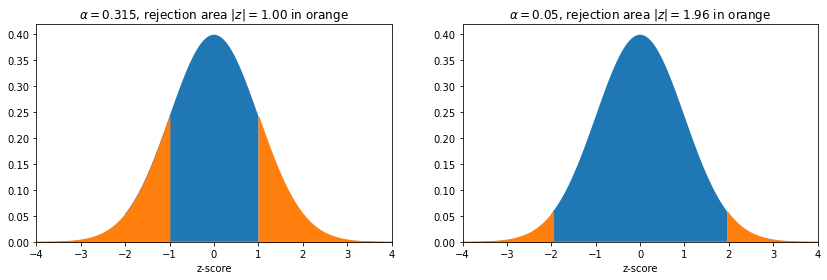

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
plt.subplots_adjust(hspace=0.4)

alpha = 0.315
z = norm.ppf(1-(alpha/2))
x_null = np.linspace(-2, z, 100)
ax1.fill_between(x=x_null, y1=0, y2=norm.pdf(x_null))
x_alt_left  = np.linspace(-4, -z, 100)
x_alt_right = np.linspace(z, 4, 100)
ax1.fill_between(x=x_alt_left,  y1=0, y2=norm.pdf(x_alt_left), color='tab:orange')
ax1.fill_between(x=x_alt_right, y1=0, y2=norm.pdf(x_alt_right), color='tab:orange')
ax1.set_title(f"$\\alpha = {alpha}$, rejection area $|z| = {z:.2f}$ in orange")
ax1.set_xlim(x_alt_left.min(), x_alt_right.max())
ax1.set_ylim(0);
ax1.set_xlabel("z-score")

alpha = 0.05
z = norm.ppf(1-(alpha/2))
x_null = np.linspace(-2, z, 100)
ax2.fill_between(x=x_null, y1=0, y2=norm.pdf(x_null))
x_alt_left  = np.linspace(-4, -z, 100)
x_alt_right = np.linspace(z, 4, 100)
ax2.fill_between(x=x_alt_left,  y1=0, y2=norm.pdf(x_alt_left), color='tab:orange')
ax2.fill_between(x=x_alt_right, y1=0, y2=norm.pdf(x_alt_right), color='tab:orange')
ax2.set_title(f"$\\alpha = {alpha}$, rejection area $|z| = {z:.2f}$ in orange")
ax2.set_xlim(x_alt_left.min(), x_alt_right.max())
ax2.set_ylim(0);
ax2.set_xlabel("z-score");

#### Interactive plot of the rejection region defined by $\alpha$

In [ ]:
@interact(alpha=(0.05, 1, 0.01))
def alpha_rejection_region_interact(alpha=0.05):
    fig, ax1 = plt.subplots()
    z = norm.ppf(1-(alpha/2))
    x_null = np.linspace(-z, z, 100)
    ax1.fill_between(x=x_null, y1=0, y2=norm.pdf(x_null))
    x_alt_left  = np.linspace(-4, -z, 100)
    x_alt_right = np.linspace(z, 4, 100)
    ax1.fill_between(x=x_alt_left,  y1=0, y2=norm.pdf(x_alt_left), color='tab:orange')
    ax1.fill_between(x=x_alt_right, y1=0, y2=norm.pdf(x_alt_right), color='tab:orange')
    ax1.set_title(f"$\\alpha = {alpha}$, rejection area $|z| = {z:.2f}$ in orange")
    ax1.set_xlim(x_alt_left.min(), x_alt_right.max())
    ax1.set_ylim(0);
    ax1.set_xlabel("z-score")

interactive(children=(FloatSlider(value=0.05, description='alpha', max=1.0, min=0.05, step=0.01), Output()), _…

In [ ]:
# just making sure we're using the data from the example
delta = p_a - p_b
se = np.sqrt((p_a*(1-p_a)) / N_A  +  (p_b*(1-p_b)) / N_B)
W = (delta - 0) / se

### Using the Wald statistic to conduct the significance test

Recall the significance test is that if $|W| > z_{\alpha/2}$ then you can reject the null hypothesis.  

By taking the absolute value of $|W|$, we can cover the case when $W$ is both negative and positive, checking both tails of the distribution at once.

Our $z_{\alpha/2}$ value is the critical statistic which defines the orange rejection regions as shown above.  If the Wald statistic exceeds this "z-score" then we reject.

#### Wald confidence interval

For the Wald test, if the null hypothesis test parameter falls _outside_ of the confidence interval formed by the test parameter and the standard error, then the null hypothesis can be rejected (Wasserman 2004; theorem 10.10)

Recall the null hypothesis is that $\hat{\delta} = 0$: so if 0 is within this confidence interval, we cannot reject the null, but if 0 is not within this confidence interval we do reject the null.

In this case as before, we see that 0 is not within this interval, so we reject the null and conclude the explanations are not statistically equal.

In [ ]:
C = (delta - se*z, delta + se*z)
C

(0.04805571266617198, 0.5852776206671613)

Here's how the significance test works, with the comparison of the $W$ statistic to the $z$-score
- the null hypothesis of equal proportions is rejected if the green $|W|$ line is within the orange rejection region, where $|W| > z_{\alpha/2}$.

The second graph shows the confidence interval approach
- the null hypothesis of equal proportions is rejected if the confidence interval does not cross the 0 line.

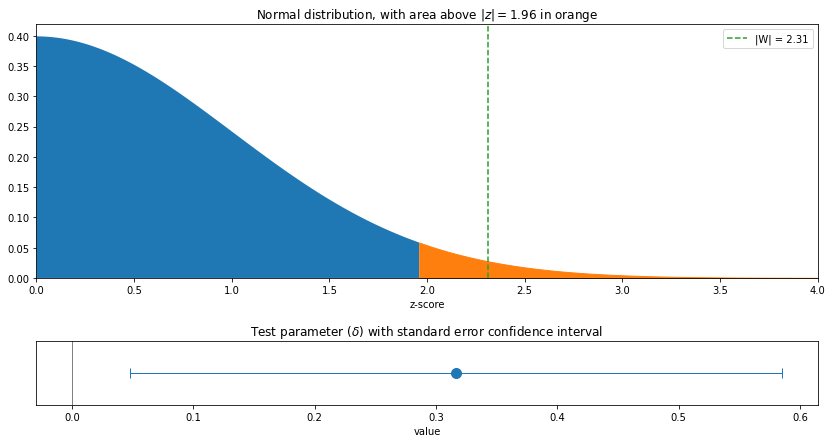

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), gridspec_kw=dict(height_ratios=[2, 0.5]))
plt.subplots_adjust(hspace=0.4)

x_null = np.linspace(0, z, 100)
ax1.fill_between(x=x_null, y1=0, y2=norm.pdf(x_null))
x_alt_right = np.linspace(z, 4, 100)
ax1.fill_between(x=x_alt_right, y1=0, y2=norm.pdf(x_alt_right), color='tab:orange')
ax1.set_title(f"Normal distribution, with area above $|z| = {z:.2f}$ in orange")
ax1.set_xlim(0, x_alt_right.max())
ax1.set_ylim(0);
ax1.axvline(abs(W), color='tab:green', linestyle='--', label=f"|W| = {abs(W):.2f}")
ax1.set_xlabel("z-score")
ax1.legend();

ax2.set_title("Test parameter ($\delta$) with standard error confidence interval")
ax2.set_xlabel("value")
ax2.errorbar(x=delta, xerr=se*z, y=0, marker='o', markersize=10, capsize=5, linewidth=1)
ax2.axvline(0, color='grey', linewidth=1)
ax2.set_yticks([]);

### Interactive Wald test

In [ ]:
@interact(p_a=(0.01, 1, 0.01), p_b=(0.01, 1, 0.01), N_A=(1, 100), N_B=(1, 100))
def interactive_wald_test(p_a=0.5, p_b=0.4, N_A=10, N_B=10):
    delta = p_a - p_b
    se = np.sqrt((p_a*(1-p_a)) / N_A  +  (p_b*(1-p_b)) / N_B)
    W = (delta - 0) / se

    print(f'^delta = {delta:.4f}, ^se = {se:.4f}')
    print(f"W = {W:.4f}")
    
    W = abs(W)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), gridspec_kw=dict(height_ratios=[2, 0.5]))
    plt.subplots_adjust(hspace=0.4)
    
    x2lim = max(4, W*1.01)

    x_null = np.linspace(0, z, 100)
    ax1.fill_between(x=x_null, y1=0, y2=norm.pdf(x_null))
    x_alt_right = np.linspace(z, x2lim, 100)
    ax1.fill_between(x=x_alt_right, y1=0, y2=norm.pdf(x_alt_right), color='tab:orange')
    ax1.set_title(f"Normal distribution, with area above $|z| = {z:.2f}$ in orange")
    ax1.set_xlim(0, x2lim)
    ax1.set_ylim(0);
    ax1.axvline(W, color='tab:green', linestyle='--', label=f"|W| = {W:.2f}")
    ax1.set_xlabel("z-score")
    ax1.legend();

    ax2.set_title("Test parameter ($\delta$) with standard error confidence interval")
    ax2.set_xlabel("value")
    ax2.errorbar(x=delta, xerr=se*z, y=0, marker='o', markersize=10, capsize=5, linewidth=1)
    ax2.axvline(0, color='grey', linewidth=1)
    ax2.set_yticks([]);

interactive(children=(FloatSlider(value=0.5, description='p_a', max=1.0, min=0.01, step=0.01), FloatSlider(val…

# $p$-values

(Wasserman 2004, Chapter 10.2)

The hypothesis test so far has been just one simple comparison: accept or reject the null hypothesis? All this boils down to is, does the Wald statistic fall within the rejection region, or does it not?

The rejection region was defined by our desired level of $\alpha = 0.05$ which we chose ahead of time.  However, we can ask a different question.

**What is the smallest $\alpha$ at which we would reject the null hypothesis ($H_0$)?**

$|W|$ is the smallest z-score where we can reject the null hypothesis!  This minimal rejection region is in green below: it is just the area of the Normal distribution's tails defined by $|W|$.

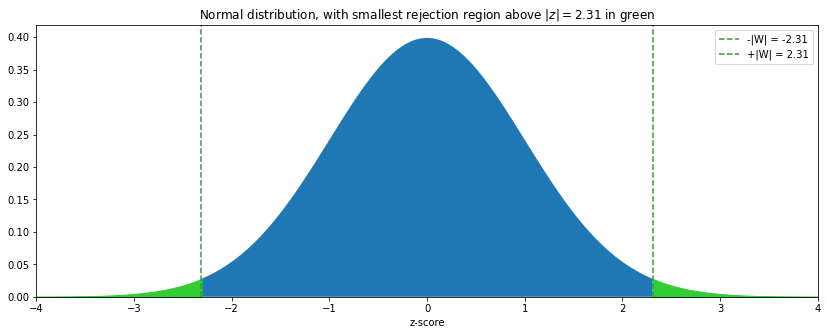

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(14, 5))
plt.subplots_adjust(hspace=0.4)

xlim = max(4, W*1.01)
critical_z = abs(W)
x_null = np.linspace(-critical_z, critical_z, 100)
ax1.fill_between(x=x_null, y1=0, y2=norm.pdf(x_null))
x_rej_left = np.linspace(-xlim, -critical_z, 100)
x_rej_right = np.linspace(critical_z, xlim, 100)
ax1.fill_between(x=x_rej_left, y1=0, y2=norm.pdf(x_rej_left), color='limegreen')
ax1.fill_between(x=x_rej_right, y1=0, y2=norm.pdf(x_rej_right), color='limegreen')
ax1.set_title(f"Normal distribution, with smallest rejection region above $|z| = {critical_z:.2f}$ in green")
ax1.set_xlim(-xlim, xlim)
ax1.set_ylim(0);
ax1.axvline(-abs(W), color='tab:green', linestyle='--', label=f"-|W| = {-abs(W):.2f}")
ax1.axvline(abs(W), color='tab:green', linestyle='--', label=f"+|W| = {abs(W):.2f}")
ax1.set_xlabel("z-score")
ax1.legend();

### But what is the $p$-value?

Definition of the $p$-value:

> The $p$-value is the probability (under $H_0$) of observing a value of the test statistic the same as or more extreme than what was actually observed.

(Wasserman 2004, p 158)

Just like the area under the Normal distribution curve defines a probability, the area of the rejection region is the probability of observing a value that falls within the rejection region.  This is exactly how we compute our $p$-value!  So we need to compute the area of the green regions.

For the two-tailed Wald test, $p\text{-value} = 2 \Phi(-|W|)$, where $\Phi$ is the cumulative density function of the Normal distribution

In [ ]:
tail_probability = norm.cdf(-abs(W))
p_value = 2*tail_probability
print(f"p = {p_value:.5f}")

p = 0.02085


This means that there is about a 2% probability that, if the null hypothesis were true, that we would see a difference in means as extreme as the one we observed.

Once we have computed the $p$-value, we don't have to care about the test statistic or the Wald statistic anymore.

This is useful because there are all kinds of statistical tests in existence, and the $p$-value is single way to understand the value of any statistical test without worrying about each test's different test statistics and how they work.

### $\alpha$ is still our rejection region

Before our rejection region was defined by the $z$-score and its comparison to the Wald statistic $|W|$.  Now, $\alpha$ defines a region of $p$-values!  If the observed evidence produces a statistical test which generates a $p$-value that is less than $\alpha$, we reject the null hypothesis (for our example, we conclude that the explanations are not equally effective).

In [ ]:
print(f"p = {p_value:.5f}, alpha = {alpha}, p < {alpha}? ", p_value < alpha)

p = 0.02085, alpha = 0.05, p < 0.05?  True


<div style="height:200px"></div>

# Appendix

## Exploring Bernoulli distribution, deriving Binomial, assuming Normality

Bernoulli data gives rise to a Binomial distribution

By taking the difference in means we are creating a new Binomial distribution.

With more and more data, the Binomial distribution approaches the shape of the Normal distribution.

One Bernoulli trial — the explanation works with probability $p$, like flipping a biased coin.

In [ ]:
def bernoulli(p):
    if np.random.random() < p:
        return 1
    else:
        return 0
    
bernoulli(p=0.5)

0

$n$ Bernoulli trials: we flip $n$ biased coins with probability $p$:

In [ ]:
n = 10
flips = [bernoulli(p=0.5) for coin_i in range(n)]
flips

[0, 0, 1, 1, 0, 0, 1, 0, 1, 0]

Out of these coin flips, how many heads (1s) did we get?

In [ ]:
flips.count(1)

4

So what is the mean probability of heads in this sample?

In [ ]:
flips.count(1) / len(flips)

0.4

Run this experiment many times.  Each time flip $n$ coins and keep track of how many heads (1s) you get:

In [ ]:
flips_1 = [bernoulli(p=0.5) for coin_i in range(n)]
flips_2 = [bernoulli(p=0.5) for coin_i in range(n)]
flips_3 = [bernoulli(p=0.5) for coin_i in range(n)]
flips_4 = [bernoulli(p=0.5) for coin_i in range(n)]

num_heads = [flips_1.count(1), flips_2.count(1), flips_3.count(1), flips_4.count(1)]
num_heads

[2, 8, 3, 4]

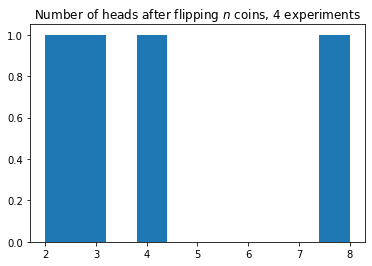

In [ ]:
plt.title("Number of heads after flipping $n$ coins, 4 experiments")
plt.hist(num_heads, bins=10);

Lets automate the above, and run a bunch of trials:

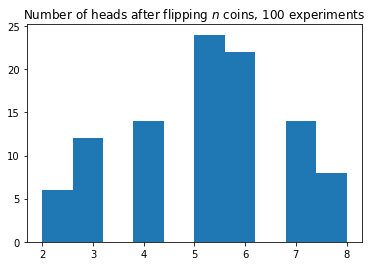

In [ ]:
def flip_biasedcoins_countheads(n, p):
    flips = [bernoulli(p=p) for coin_i in range(n)]
    return flips.count(1)

num_flip_experiments = 100
num_heads = [flip_biasedcoins_countheads(n=10, p=0.5) for _ in range(num_flip_experiments)]
plt.title(f"Number of heads after flipping $n$ coins, {len(num_heads)} experiments")
plt.hist(num_heads);

Lets run even more to get a better idea of what would happen in the infinite data (theoretical) case:

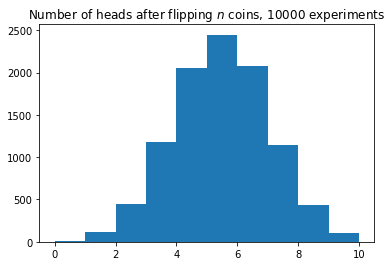

In [ ]:
num_flip_experiments = 10000
num_heads_alot = [flip_biasedcoins_countheads(n=10, p=0.5) for _ in range(num_flip_experiments)]
plt.title(f"Number of heads after flipping $n$ coins, {len(num_heads_alot)} experiments")
plt.hist(num_heads_alot);

We just derived the Binomial distribution!  It is just how many times we would get heads if we flipped $n$ biased coins with probability $p$.

Alternatively, it models the number of students who like an explanation if the explanation has a probability $p$ of being good, and we asked $n$ students.

But the Wald test isn't using the count of students who liked the explanation, it is using the proportion of students who liked it. Is the binomial mean also binomially distributed?

In [ ]:
from decimal import Decimal
from collections import Counter

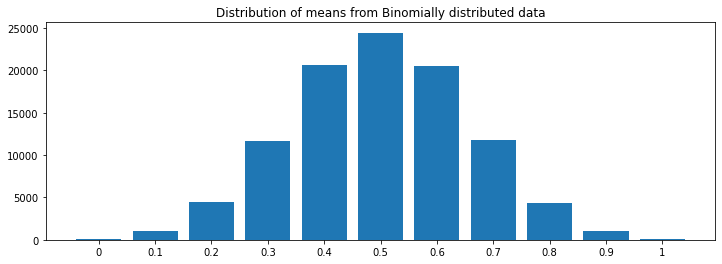

In [ ]:
def random_binomial_mean(n, p):
    count_heads = flip_biasedcoins_countheads(n=n, p=p)
    return Decimal(count_heads) / n

num_flip_experiments = 100000
means_many = [random_binomial_mean(n=10, p=0.5) for _ in range(num_flip_experiments)]
h = Counter(means_many)

fig, ax = plt.subplots(figsize=(12, 4))
xs = sorted(h.keys())
b = [h[_x] for _x in xs]
ax.set_title("Distribution of means from Binomially distributed data")
ax.bar(x=np.arange(len(xs)), height=b)
ax.set_xticks(np.arange(len(xs)))
ax.set_xticklabels(labels=map(str, xs));

And our Wald test isn't just means, it is a difference in means. What about that?

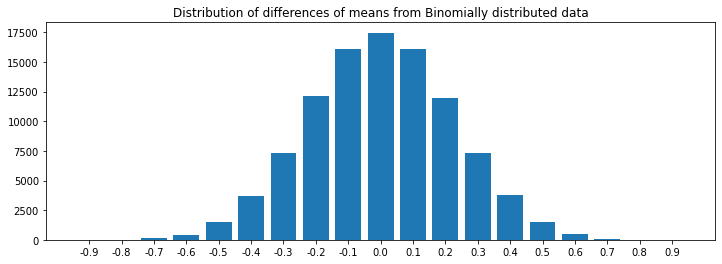

In [ ]:
def random_difference_binomial_means(n, p):
    exp1_count_heads = flip_biasedcoins_countheads(n=n, p=p)
    m1 = Decimal(exp1_count_heads) / n
    exp2_count_heads = flip_biasedcoins_countheads(n=n, p=p)
    m2 = Decimal(exp2_count_heads) / n
    return m1-m2


num_flip_experiments = 100000
means_many = [random_difference_binomial_means(n=10, p=0.5) for _ in range(num_flip_experiments)]
h = Counter(means_many)

fig, ax = plt.subplots(figsize=(12, 4))
xs = sorted(h.keys())
b = [h[_x] for _x in xs]
ax.set_title("Distribution of differences of means from Binomially distributed data")
ax.bar(x=np.arange(len(xs)), height=b)
ax.set_xticks(np.arange(len(xs)))
ax.set_xticklabels(labels=map(str, xs));

For binomial distributed data, as $n$ i.e. the number of coin flips (or students seeing explanations) approaches infinity, we get an approximately Normal distribution.

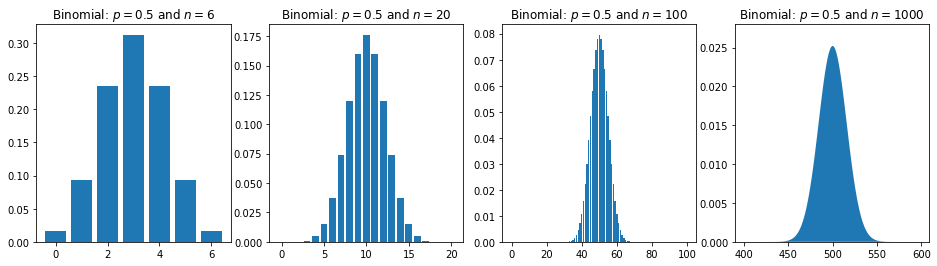

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
ntrials = [6, 20, 100]

for n, ax in zip(ntrials, axes.flatten()[:-1]):
    x = np.arange(0, n+1)
    ax.set_title(f"Binomial: $p=0.5$ and $n={n}$")
    ax.bar(x=x, height=stats.binom.pmf(x, p=0.5, n=n))
    
ax = axes[-1]
x = np.arange(400, 600)
ax.fill_between(x=x, y1=0, y2=stats.binom.pmf(x, p=0.5, n=1000))
ax.set_ylim(0, 0.028)
ax.set_title("Binomial: $p=0.5$ and $n=1000$");